In [2]:
!pip install -Uq fastai torch timm kaggle
import numpy as np
import pandas as pd 
import os
import timm
import torch
from pathlib import Path
from fastai.vision.all import *
import shutil
# from google.colab import files

In [ ]:
# files.upload() # upload kaggle.json here

In [2]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
# !chmod 600 /root/.kaggle/kaggle.json

In [23]:
# !rm -r cat dog Train

In [14]:
# !kaggle datasets download -d ma7555/cat-breeds-dataset
# !unzip -q cat-breeds-dataset.zip -d cat
# # !rm cat-breeds-dataset.zip
# !kaggle datasets download -d jessicali9530/stanford-dogs-dataset
# !unzip -q stanford-dogs-dataset.zip -d dog
# # !rm stanford-dogs-dataset.zip

100% 1.92G/1.93G [00:10<00:00, 157MB/s]
100% 1.93G/1.93G [00:10<00:00, 200MB/s]
 97% 725M/750M [00:04<00:00, 229MB/s]
100% 750M/750M [00:04<00:00, 165MB/s]


In [24]:
# !unzip -q cat-breeds-dataset.zip -d cat
# !unzip -q stanford-dogs-dataset.zip -d dog

In [4]:
cat_df = pd.read_csv('cat/data/cats.csv')
cat_df

,Unnamed: 0,id,url,type,age,gender,size,coat,breed,photos,med_photos
0,0,46744842,https://www.petfinder.com/cat/arianna-46744842/ny/port-chester/nyc-bronx-westchester-cat-coalition-nyc-cat-coalition-ny622/?referrer_id=3830981a-ad4c-4f85-872c-ca9edc50a67e,Cat,Adult,Female,Medium,NaN,Abyssinian,"[{'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46744842/1/?bust=1575403984&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46744842/1/?bust=1575403984&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46744842/1/?bust=1575403984&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46744842/1/?bust=1575403984'}, {'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46744842/3/?bust=1575403984&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46744842/3/?bust=1575403984&width=300', 'large'...","['https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46744842/1/?bust=1575403984&width=300', 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46744842/3/?bust=1575403984&width=300', 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46744842/2/?bust=1575403984&width=300']"
1,1,46717321,https://www.petfinder.com/cat/ozzy-46717321/oh/zanesville/the-animal-shelter-society-inc-oh181/?referrer_id=3830981a-ad4c-4f85-872c-ca9edc50a67e,Cat,Adult,Male,Extra Large,NaN,Abyssinian,"[{'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46717321/1/?bust=1575099676&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46717321/1/?bust=1575099676&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46717321/1/?bust=1575099676&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46717321/1/?bust=1575099676'}]",['https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46717321/1/?bust=1575099676&width=300']
2,2,46626338,https://www.petfinder.com/cat/zena-46626338/ca/santa-barbara/santa-barbara-county-animal-services-santa-barbara-shelter-ca63/?referrer_id=3830981a-ad4c-4f85-872c-ca9edc50a67e,Cat,Senior,Female,Medium,NaN,Abyssinian,"[{'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46626338/1/?bust=1575423383&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46626338/1/?bust=1575423383&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46626338/1/?bust=1575423383&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46626338/1/?bust=1575423383'}]",['https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46626338/1/?bust=1575423383&width=300']
3,3,46620170,https://www.petfinder.com/cat/mika-46620170/ca/la-puente/vida-rescue-ca2713/?referrer_id=3830981a-ad4c-4f85-872c-ca9edc50a67e,Cat,Baby,Female,Small,Short,Abyssinian,"[{'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46620170/1/?bust=1574168525&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46620170/1/?bust=1574168525&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46620170/1/?bust=1574168525&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46620170/1/?bust=1574168525'}, {'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46620170/2/?bust=1574168528&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46620170/2/?bust=1574168528&width=300', 'large'...","['https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46620170/1/?bust=1574168525&width=300', 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46620170/2/?bust=1574168528&width=300', 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46620170/3/?bust=1574339804&width=300', 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46620170/4/?bust=1574339805&width=300']"
4,4,46582751,https://www.petfinder.com/cat/ruby-46582751/fl/titusville/spca-of-brevard-fl76/?referrer_id=3830981a-ad4c-4f85-872c-ca9edc50a67e,Cat,Young,Female,Medium,NaN,Abyssinian,"[{'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46582751/1/?bust=1575359381&width=100', 'medium': 'ht

In [5]:
breed_count= cat_df.breed.value_counts().sort_values()
breed_count[:20]

York Chocolate          1
Chinchilla              3
Canadian Hairless       4
Burmilla                8
Cymric                 17
LaPerm                 18
Singapura              22
American Wirehair      23
Chausie                23
Javanese               27
Somali                 36
Oriental Long Hair     39
Korat                  70
Selkirk Rex            76
Chartreux              86
Silver                 94
Oriental Tabby        103
Pixiebob              111
Devon Rex             119
Ocicat                121
Name: breed, dtype: int64

In [6]:
remove_breed =breed_count.loc[breed_count <40]
remove_breed, remove_breed.index

(York Chocolate         1
 Chinchilla             3
 Canadian Hairless      4
 Burmilla               8
 Cymric                17
 LaPerm                18
 Singapura             22
 American Wirehair     23
 Chausie               23
 Javanese              27
 Somali                36
 Oriental Long Hair    39
 Name: breed, dtype: int64,
 Index(['York Chocolate', 'Chinchilla', 'Canadian Hairless', 'Burmilla',
        'Cymric', 'LaPerm', 'Singapura', 'American Wirehair', 'Chausie',
        'Javanese', 'Somali', 'Oriental Long Hair'],
       dtype='object'))

In [8]:
path_to_remove = Path('cat/images')
for breed in remove_breed.index:
  remove_folder = path_to_remove/breed
  shutil.rmtree(remove_folder)

!rm -r ./dog/annotations

### rename path
    Add '_' to get the breed name in DataLoaders

In [10]:
dog_path = Path('dog/images/Images')
cat_path = Path('cat/images')

for folder in os.listdir(dog_path):
  old_path = dog_path/folder
  new_path = dog_path/ ('dog_' + folder[10:].replace('_', ' '))
  os.rename(old_path,new_path)

for folder in os.listdir(cat_path):
  old_path = cat_path/folder
  new_path = cat_path/ ('cat_' + folder)
  os.rename(old_path,new_path)

#### reorganize folder
    Move cat_path and dog_path to the Train path

In [11]:
new_path = Path('Train')
os.mkdir(new_path)

for folder in os.listdir(dog_path):
  shutil.move(dog_path/folder, new_path)

for folder in os.listdir(cat_path):
  shutil.move(cat_path/folder, new_path)


### build DataLoaders

In [12]:
train_path = new_path

In [13]:
# Split the parent's name with '_' to get the breed
def get_y(path): return path.parent.name.split('_')

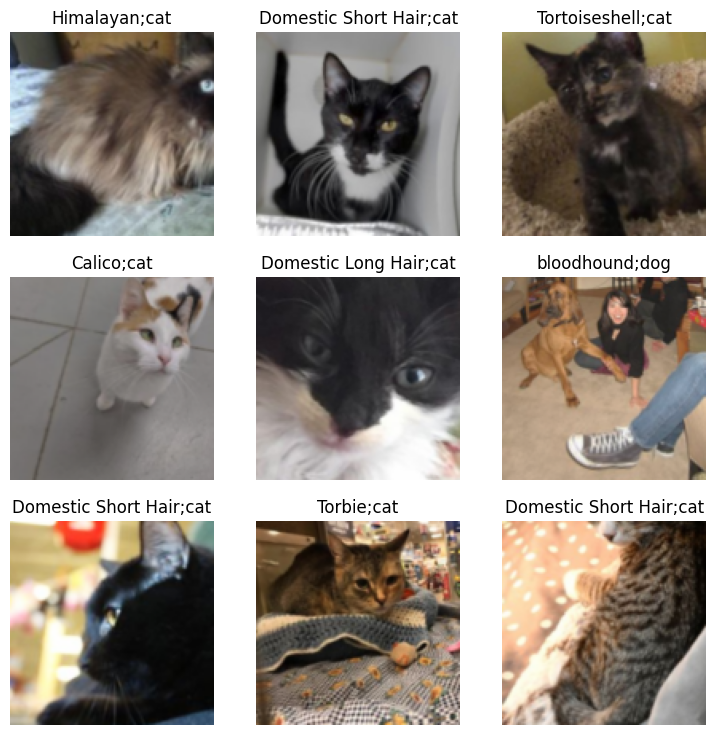

In [14]:
dblock = DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
                   get_items=get_image_files,
                   get_y=get_y,
                   splitter= RandomSplitter(0.2),
                   item_tfms=Resize(192, method='Squish'),
                   batch_tfms= aug_transforms(size= 128, min_scale=0.75)
                   )

dls = dblock.dataloaders(train_path)
dls.show_batch(max_n=9)

In [15]:
x,y = dls.one_batch()
x.shape, y.shape

(torch.Size([64, 3, 128, 128]), torch.Size([64, 177]))

In [ ]:
y[0]

In [16]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [17]:
arch = 'convnext_tiny'
loss_func = nn.BCEWithLogitsLoss()
metrics = partial(accuracy_multi, thresh=0.5)

learn = vision_learner(dls,arch=arch,loss_func=loss_func, metrics=metrics)

In [18]:
learn.summary()

Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 96 x 32 x 32   
Conv2d                                    4704       False     
LayerNorm2d                               192        True      
Identity                                                       
Conv2d                                    4800       False     
LayerNorm                                 192        True      
____________________________________________________________________________
                     64 x 32 x 32 x 384  
Linear                                    37248      False     
GELU                                                           
Dropout                                                        
____________________________________________________________________________
                     64 x 32 x 32 x 96   
Linear                                    36960      False     
Dropout                            

In [20]:
x,y = dls.train.one_batch()
output = learn.model(x)
output.size()

torch.Size([64, 177])

In [ ]:
learn.fit_one_cycle(1,2e-3)

epoch,train_loss,valid_loss,accuracy_multi,time


In [25]:
# learn.export('model_tiny.pkl')

In [26]:
inter = Interpretation.from_learner(learn)

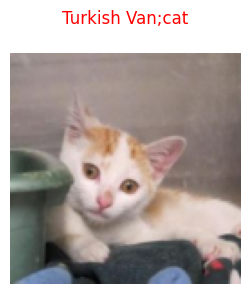

In [36]:
inter.show_results(500)

In [41]:
pred = learn.predict('Siberian-Husky-dog.jpg')
pred[1].sigmoid()

tensor([7.8045e-05, 5.9157e-06, 1.7654e-04, 4.0019e-05, 1.6570e-03, 4.1921e-05,
        1.9889e-03, 9.6338e-05, 9.4129e-06, 5.0704e-06, 2.7600e-05, 2.7917e-06,
        6.8645e-06, 5.9779e-05, 1.9690e-05, 1.4786e-06, 3.0346e-05, 4.4423e-05,
        3.1306e-04, 1.5151e-05, 2.4574e-04, 4.0596e-05, 4.2874e-05, 3.8633e-05,
        1.6695e-05, 4.0445e-06, 4.1036e-04, 2.2921e-04, 2.5205e-06, 1.8439e-05,
        1.0167e-04, 2.5288e-05, 6.4790e-05, 2.6773e-06, 7.1596e-04, 2.1439e-04,
        1.1118e-05, 5.5052e-04, 7.4734e-04, 1.6932e-02, 1.1073e-05, 2.0019e-05,
        1.0164e-05, 5.6761e-05, 3.2756e-05, 1.8614e-01, 8.7220e-06, 3.0007e-04,
        2.8351e-04, 1.1121e-04, 5.3464e-06, 1.5856e-06, 2.7336e-05, 2.0270e-05,
        4.8834e-06, 1.1350e-05, 1.1374e-05, 7.8652e-06, 3.4189e-06, 1.3134e-05,
        1.5224e-05, 6.1291e-05, 1.9897e-05, 3.8849e-06, 4.6810e-05, 7.2772e-05,
        2.1545e-06, 3.8678e-05, 1.4092e-04, 6.1282e-06, 1.6202e-05, 2.7152e-05,
        3.3265e-06, 9.5346e-04, 4.8629e-

In [81]:
predict = torch.where(pred[1].sigmoid()>0.4)[0]
predict

tensor([108, 149])

In [82]:
learn.dls.vocab

['Abyssinian', 'Afghan hound', 'African hunting dog', 'Airedale', 'American Bobtail', 'American Curl', 'American Shorthair', 'American Staffordshire terrier', 'Appenzeller', 'Applehead Siamese', 'Australian terrier', 'Balinese', 'Bedlington terrier', 'Bengal', 'Bernese mountain dog', 'Birman', 'Blenheim spaniel', 'Bombay', 'Border collie', 'Border terrier', 'Boston bull', 'Bouvier des Flandres', 'Brabancon griffon', 'British Shorthair', 'Brittany spaniel', 'Burmese', 'Calico', 'Cardigan', 'Chartreux', 'Chesapeake Bay retriever', 'Chihuahua', 'Cornish Rex', 'Dandie Dinmont', 'Devon Rex', 'Dilute Calico', 'Dilute Tortoiseshell', 'Doberman', 'Domestic Long Hair', 'Domestic Medium Hair', 'Domestic Short Hair', 'Egyptian Mau', 'English foxhound', 'English setter', 'English springer', 'EntleBucher', 'Eskimo dog', 'Exotic Shorthair', 'Extra-Toes Cat - Hemingway Polydactyl', 'French bulldog', 'German shepherd', 'German short-haired pointer', 'Gordon setter', 'Great Dane', 'Great Pyrenees', 'Gr

In [83]:
learn.dls.vocab[predict]

(#2) ['Siberian husky','dog']

In [84]:
def pred(path):
    pred = learn.predict(path)
    predict = torch.where(pred[1].sigmoid()>0.4)[0]
    return learn.dls.vocab[predict]

In [85]:
pred('shiba.jpg')

(#2) ['dingo','dog']

In [88]:
pred('Pug.jpg')

(#2) ['dog','pug']

In [89]:
pred('test.jpg')

(#2) ['Bengal','cat']

In [90]:
!cp train_project.ipynb ReDi